In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics -q

import ultralytics
ultralytics.checks()

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


In [ ]:
!ls

In [ ]:
from ultralytics import YOLO

In [18]:
model = YOLO('/content/best.pt')

import os
import random

#random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))
#file_name = os.path.join(f"{dataset.location}/test/images", random_file)
file_name = '/content/313_jpg.rf.d04383ddcdd69acfecc3e5a46530544e.jpg'
results = model(file_name)

print(results[0])


image 1/1 /content/313_jpg.rf.d04383ddcdd69acfecc3e5a46530544e.jpg: 640x640 19.3ms
Speed: 2.7ms preprocess, 19.3ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'LCD', 1: 'LCU', 2: 'LID', 3: 'LIU', 4: 'LMD', 5: 'LMU', 6: 'LPMD', 7: 'LPMU', 8: 'RCD', 9: 'RCU', 10: 'RID', 11: 'RIU', 12: 'RMD', 13: 'RMU', 14: 'RPMD', 15: 'RPMU'}
obb: ultralytics.engine.results.OBB object
orig_img: array([[[ 82,  82,  82],
        [ 86,  86,  86],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [ 90,  90,  90],
        [ 78,  78,  78]],

       [[252, 252, 252],
        [251, 251, 251],
        [253, 253, 253],
        ...,
        [249, 249, 249],
        [248, 248, 248],
        [245, 245, 245]],

       [[253, 253, 253],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [249, 249, 249],
        [254, 254, 254],
        [255, 255, 2

In [27]:
#results = model('/content/387_jpg.rf.bbba86d6c7f9c9dd610eceb05e123bd3.jpg')
obb = results[0].obb
xywhr = obb.xywhr
print(xywhr.shape)
print(xywhr)
#torch.Size([31, 5])
if xywhr.is_cuda:  # Check if the tensor is on GPU
    xywhr = xywhr.cpu()  # Move the tensor to the CPU

# Now, you can safely convert to numpy
xywhr = xywhr.numpy()


torch.Size([32, 5])
tensor([[263.8897, 466.2540, 135.6880,  30.7303,   1.7283],
        [252.9921, 327.8450, 142.3151,  31.0759,   1.6203],
        [334.6184, 337.7638, 138.5678,  31.9733,   1.6030],
        [183.7394, 449.0874, 145.3243,  49.5958,   1.8489],
        [386.8553, 328.6321, 135.8314,  30.2557,   1.5267],
        [114.7902, 271.0251, 126.2561,  38.8337,   1.6996],
        [457.0492, 295.1251, 143.7493,  41.7645,   1.5618],
        [490.9828, 419.3825, 138.2098,  47.2528,   1.3380],
        [233.2439, 324.7299, 129.1691,  30.0767,   1.6402],
        [452.7194, 437.5157, 143.6224,  51.1724,   1.3147],
        [348.1642, 460.8448, 105.6589,  25.0821,   1.5575],
        [215.2529, 463.2667, 140.0811,  35.8934,   1.7605],
        [143.2716, 429.1734, 138.1638,  46.9989,   1.8390],
        [147.1607, 287.0250, 138.1449,  41.1110,   1.6573],
        [180.7863, 304.8603, 133.6938,  44.1299,   1.5366],
        [292.0184, 462.9477, 110.3682,  25.1291,   1.5528],
        [420.7166, 4

# Single cell Run

# Match one to one

# Supervision

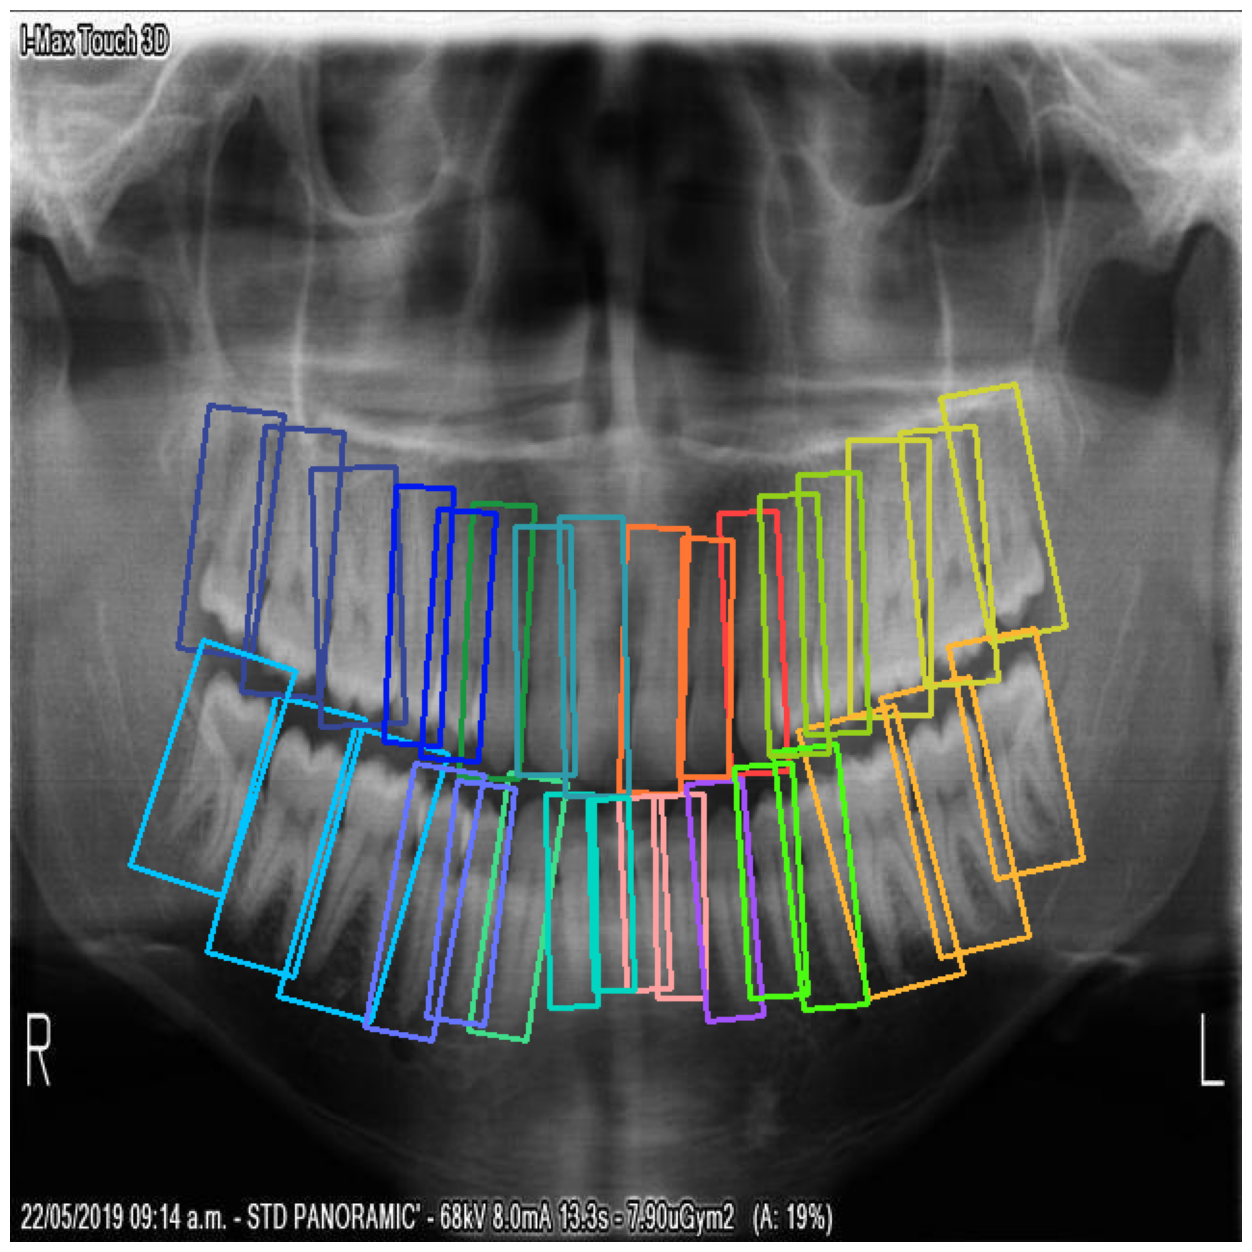

In [21]:
!pip install supervision==0.18.0 -q

import supervision as sv
import cv2

detections = sv.Detections.from_ultralytics(results[0])

oriented_box_annotator = sv.OrientedBoxAnnotator()
annotated_frame = oriented_box_annotator.annotate(
    scene=cv2.imread(file_name),
    detections=detections
)

sv.plot_image(image=annotated_frame, size=(16, 16))

In [30]:
t1 = model('/content/392_jpg.rf.fd7eb0c4b040fd546f85c864eff048e1.jpg')
obb = t1[0].obb
asdfg = obb.xywhr
print(asdfg)
if asdfg.is_cuda:  # Check if the tensor is on GPU
    asdfg = asdfg.cpu()  # Move the tensor to the CPU

# Now, you can safely convert to numpy
asdfg = asdfg.numpy()


image 1/1 /content/392_jpg.rf.fd7eb0c4b040fd546f85c864eff048e1.jpg: 640x640 16.2ms
Speed: 3.7ms preprocess, 16.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
tensor([[124.5542, 327.4409, 118.7759,  44.8205,   1.7584],
        [187.0939, 257.7312, 140.0882,  39.5219,   1.6245],
        [185.3882, 393.5447, 151.1695,  51.3969,   1.8790],
        [449.4781, 400.6655, 147.8144,  52.0429,   1.3114],
        [300.9986, 287.5178, 162.7560,  33.7805,   1.5653],
        [356.9946, 279.8389, 154.2538,  27.0409,   1.5635],
        [481.3304, 369.2686, 138.8989,  48.6509,   1.3364],
        [472.6324, 238.9047, 133.6495,  36.9957,   1.4159],
        [368.5160, 432.4365, 151.8555,  30.5016,   1.4651],
        [306.0714, 429.7686, 121.2499,  21.3479,   1.5935],
        [151.8362, 367.4749, 138.6353,  48.2464,   1.8804],
        [129.9617, 209.5680, 121.9474,  36.7093,   1.6721],
        [279.2461, 274.8728, 164.3977,  28.5630,   1.6541],
        [509.7407, 334.1707, 119.6758, 

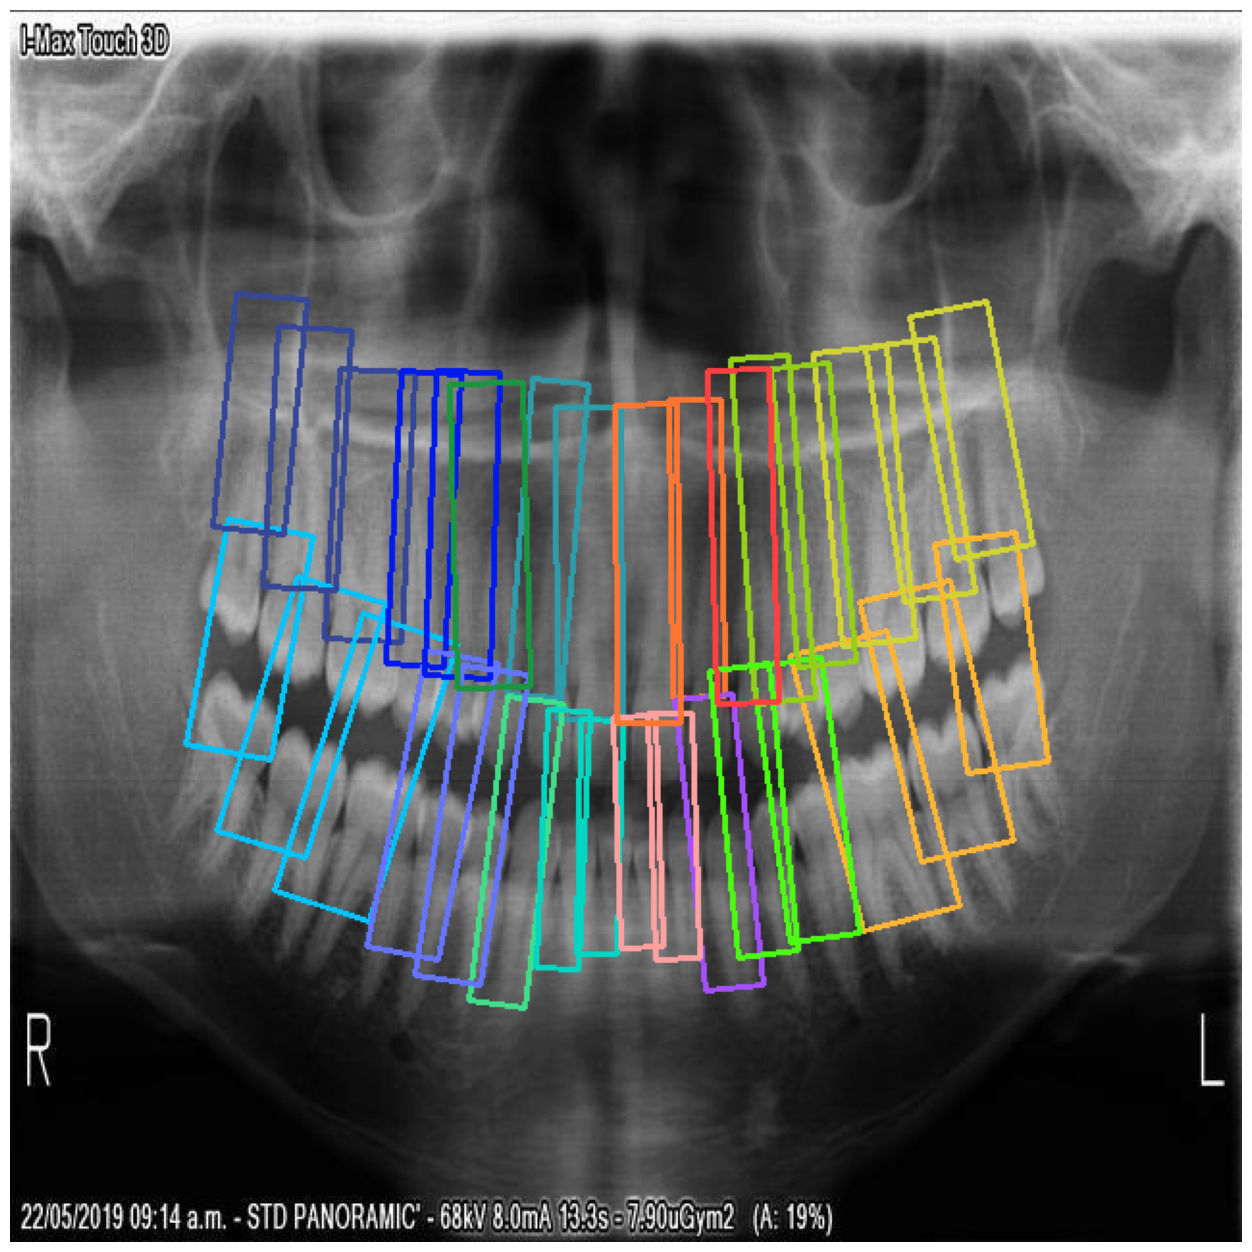

In [32]:
detections = sv.Detections.from_ultralytics(t1[0])

oriented_box_annotator = sv.OrientedBoxAnnotator()
annotated_frame = oriented_box_annotator.annotate(
    scene=cv2.imread(file_name),
    detections=detections
)

sv.plot_image(image=annotated_frame, size=(16, 16))

In [33]:
import numpy as np
import math

# Function to get the corners of a rotated bounding box
def get_rotated_box_corners(x, y, w, h, r):
    # Convert rotation angle to radians
    r = math.radians(r)

    # Half width and half height
    w_half = w / 2
    h_half = h / 2

    # Coordinates of the four corners before rotation
    corners = np.array([
        [-w_half, -h_half],  # Top-left corner
        [w_half, -h_half],   # Top-right corner
        [w_half, h_half],    # Bottom-right corner
        [-w_half, h_half]    # Bottom-left corner
    ])

    # Rotation matrix
    rotation_matrix = np.array([
        [math.cos(r), -math.sin(r)],
        [math.sin(r), math.cos(r)]
    ])

    # Rotate the corners
    rotated_corners = np.dot(corners, rotation_matrix.T)

    # Translate the corners to the center (x, y)
    rotated_corners += np.array([x, y])

    return rotated_corners

# Function to calculate IoU
def calculate_iou(gt_box, pred_box):
    # Extract ground truth and predicted boxes' [x, y, w, h, r]
    x_gt, y_gt, w_gt, h_gt, r_gt = gt_box
    x_pred, y_pred, w_pred, h_pred, r_pred = pred_box

    # Get the corners of both rotated bounding boxes
    gt_corners = get_rotated_box_corners(x_gt, y_gt, w_gt, h_gt, r_gt)
    pred_corners = get_rotated_box_corners(x_pred, y_pred, w_pred, h_pred, r_pred)

    # Compute the axis-aligned bounding boxes
    gt_min_x = np.min(gt_corners[:, 0])
    gt_max_x = np.max(gt_corners[:, 0])
    gt_min_y = np.min(gt_corners[:, 1])
    gt_max_y = np.max(gt_corners[:, 1])

    pred_min_x = np.min(pred_corners[:, 0])
    pred_max_x = np.max(pred_corners[:, 0])
    pred_min_y = np.min(pred_corners[:, 1])
    pred_max_y = np.max(pred_corners[:, 1])

    # Calculate intersection area
    inter_x1 = max(gt_min_x, pred_min_x)
    inter_y1 = max(gt_min_y, pred_min_y)
    inter_x2 = min(gt_max_x, pred_max_x)
    inter_y2 = min(gt_max_y, pred_max_y)

    inter_width = max(0, inter_x2 - inter_x1)
    inter_height = max(0, inter_y2 - inter_y1)
    intersection_area = inter_width * inter_height

    # Calculate union area
    gt_area = (gt_max_x - gt_min_x) * (gt_max_y - gt_min_y)
    pred_area = (pred_max_x - pred_min_x) * (pred_max_y - pred_min_y)
    union_area = gt_area + pred_area - intersection_area

    # Calculate IoU
    iou = intersection_area / union_area
    return iou

# Example: Ground truth box and predicted box [x, y, w, h, r]

for i in range(len(xywhr)):
  gt_box = xywhr[i]  # Ground truth (center_x, center_y, width, height, rotation_angle
  pred_box = asdfg[0] # Predicted box (center_x, center_y, width, height, rotation_angle)
  iou_value = calculate_iou(gt_box, pred_box)
  print(f"IoU: {iou_value}")




IoU: 0.0
IoU: 0.010394024662711965
IoU: 0.0
IoU: 0.0
IoU: 0.0
IoU: 0.0
IoU: 0.0
IoU: 0.0
IoU: 0.057164645199613534
IoU: 0.0
IoU: 0.0
IoU: 0.0
IoU: 0.0
IoU: 0.05955850072015014
IoU: 0.1740295722580815
IoU: 0.0
IoU: 0.0
IoU: 0.0
IoU: 0.0
IoU: 0.0
IoU: 0.12195189984889668
IoU: 0.0
IoU: 0.0
IoU: 0.0
IoU: 0.0
IoU: 0.0
IoU: 0.0
IoU: 0.0
IoU: 0.0
IoU: 0.0
IoU: 0.0
IoU: 0.0
